In [5]:
using Plots
using FileIO
using JLD2
using Base.Threads
#Pkg; Pkg.add("DistributedArrays")
println("nthreads = $(nthreads())")
using Printf
using LaTeXStrings

nthreads = 2


In [6]:
include("aux_functions.jl")

F! (generic function with 1 method)

In [32]:
file_name = "Results/try_100_100.jld2"

data = load(file_name);
run_name = data["run_name"]
@show (x0,x1,p_bump,A) = data["par_init"]
@show (Nl, L, dl, Nr, R, dr) = data["par_grid"]
@show (t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"]


(x0, x1, p_bump, A) = data["par_init"] = (1.2, 1.3, 4, 1.0)
(Nl, L, dl, Nr, R, dr) = data["par_grid"] = (100, 1.0, 0.010101010101010102, 100, 1.0, 0.010101010101010102)
(t_i, t_f, M, dt, M_d, dt_d) = data["par_evolv"] = (0.0, 2.0, 101, 0.02, 11, 0.2)


(0.0, 2.0, 101, 0.02, 11, 0.2)

In [33]:
v = zeros(3Nl+3Nr,M_d)

for j in 1:M_d
    tiempo = @sprintf("%05d", j)
    v[:,j] = data["u/u_$tiempo"]
end

In [34]:
    ϕ_L = view(v,1:Nl,:)
    vp = view(v,Nl+1:2Nl,:)
    vm = view(v,2Nl+1:3Nl,:)
    ϕ_R = view(v,3Nl+1:3Nl+Nr,:)
    S = view(v,3Nl+Nr+1:3Nl+2Nr,:)
    W = view(v,3Nl+2Nr+1:3Nl+3Nr,:);

    typeof(ϕ_L)

    ϕ_L

100×11 view(::Matrix{Float64}, 1:100, :) with eltype Float64:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮                        ⋮
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0 

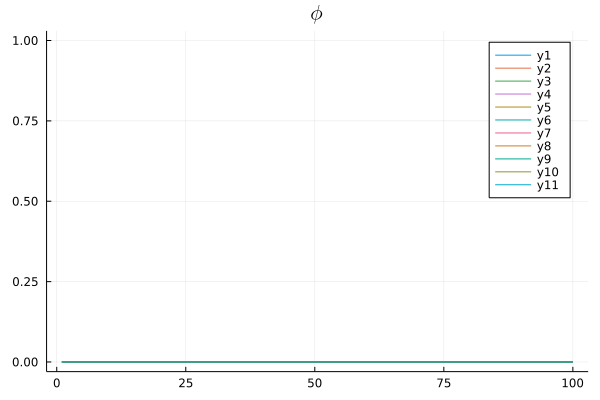

In [41]:
p = plot(title=L"\phi")
for n in 1:M_d  
    plot!(p,vp[:,n])
end

p

In [31]:
@show v[:,1]

v[:, 1] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

600-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0